# OSMSatLab: Interactive Library Demonstration

This notebook serves as a comprehensive guide and test suite for the `osmsatlab` library. 
It demonstrates how to:
1. **Initialize** the workspace with specific Areas of Interest (AOI).
2. **Automatically download** Population (WorldPop) and Service (OSM) data.
3. **Compute** accessibility and equity metrics (Provision).
4. **Visualize** results using the built-in mapping tools (`render_maps`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import shape as shp_shape

# Core library imports
from osmsatlab.core import OSMSatLab
from osmsatlab.viz import render_maps

# Configure pandas for cleaner table output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

c:\Users\darey\AppData\Local\pypoetry\Cache\virtualenvs\osmsatlab-uWzLvEYP-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Define Regions of Interest

We define bounding boxes for two distinct urban contexts:
*   **Bogotá (Residential)**: dense urban area in Colombia.
*   **Amsterdam (Residential)**: dense urban area in the Netherlands.
*   **Custom Geometry**: A polygon for Soacha, demonstrating flexibility beyond simple bounding boxes.

In [2]:
# Bounding Boxes (minx, miny, maxx, maxy)
BBOX_BOGOTA_RESIDENTIAL = (-74.1255, 4.7195, -74.0825, 4.7565)
BBOX_AMSTERDAM_RESIDENTIAL = (4.65, 52.25, 5.10, 52.55)

# Custom GeoJSON Polygon for Soacha (Colombia)
SOACHA_GEOJSON = {
    "type": "FeatureCollection",
    "features": [{
        "type": "Feature",
        "properties": {},
        "geometry": {
            "type": "Polygon",
            "coordinates": [[
                [-74.2442, 4.5572], [-74.2374, 4.5593], [-74.2325, 4.5599],
                [-74.2115, 4.5508], [-74.1824, 4.5612], [-74.1784, 4.5671],
                [-74.1801, 4.5702], [-74.1760, 4.5717], [-74.1755, 4.5750],
                [-74.1778, 4.5774], [-74.1798, 4.5773], [-74.1819, 4.5902],
                [-74.1837, 4.5957], [-74.2055, 4.6011], [-74.2175, 4.6150],
                [-74.2250, 4.6141], [-74.2346, 4.6059], [-74.2460, 4.5855],
                [-74.2503, 4.5803], [-74.2489, 4.5755], [-74.2450, 4.5702],
                [-74.2453, 4.5623], [-74.2442, 4.5572]
            ]]
        }
    }]
}
soacha_poly = shp_shape(SOACHA_GEOJSON["features"][0]["geometry"])

## 2. Analysis Workflow Helper

This helper function iterates through available service categories, calculating metrics and displaying them cleanly. It also invokes the **Visualization Module** for a detailed look at **Healthcare** services.

In [3]:
def run_analysis(lab, place_label):
    """
    Executes the full analysis suite for a given OSMSatLab instance.
    1. Visualizes 'healthcare' using 'render_maps'.
    2. Prints a detailed metrics text interface for all categories.
    """
    print(f"\n{'='*60}\nRunning Analysis: {place_label}\n{'='*60}")
    
    # --- A. Visualization (Healthcare Only) ---
    print(f"\n>> Generating Visualizations for 'Healthcare'...")
    if not lab.services['healthcare'].empty:
        render_maps(lab, place_label, service_category='healthcare')
        plt.show()
    else:
        print("No healthcare services found to visualize.")

    # --- B. Metrics Calculation (All Categories) ---
    print("\n>> Calculating Metrics for All Categories...")
    
    for category in ['healthcare', 'education_early', 'education_school', 'education_higher', 'food', 'emergency', 'green_space', 'public_transport']:
        # Check if category exists in loaded data
        if category not in lab.services or lab.services[category].empty:
            print(f"\n!! Skipping {category} (no data found).")
            continue

        # Calculate metrics for each network type
        results_eucl = lab.calculate_accessibility_metrics(service_category=category, threshold=1000, metric_type='euclidean')
        results_drive = lab.calculate_accessibility_metrics(service_category=category, threshold=5, metric_type='drive')
        results_walk = lab.calculate_accessibility_metrics(service_category=category, threshold=10, metric_type='walk')
        
        # Extract stats for easier access
        stat_e = results_eucl['coverage_stats']
        stat_d = results_drive['coverage_stats']
        stat_w = results_walk['coverage_stats']

        print('-------------------------------------------------------------------------')
        print(f"CATEGORY: {category.upper()}")
        print(f"Euclidean (1km):  {stat_e['coverage_ratio']:.2%} coverage ({stat_e['covered_population']:,} people)")
        print(f"Driving (10min):  {stat_d['coverage_ratio']:.2%} coverage ({stat_d['covered_population']:,} people)")
        print(f"Walking (20min):  {stat_w['coverage_ratio']:.2%} coverage ({stat_w['covered_population']:,} people)")

        results = lab.calculate_per_capita_metrics(service_category=category)
        print('--------------------------------------------')
        print(f"services_per_1000 (category {category}): {results['services_per_1000']}")
        print(f"people_per_service (category {category}): {results['people_per_service']}")
        print('------------------------------------------------------------------------------------------------------------')

## 3. Example: Bogotá Residential Area
Initializing analysis using a bounding box.

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [00:00<00:00, 21.07it/s]
C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area



Running Analysis: Bogotá (Res)

>> Generating Visualizations for 'Healthcare'...


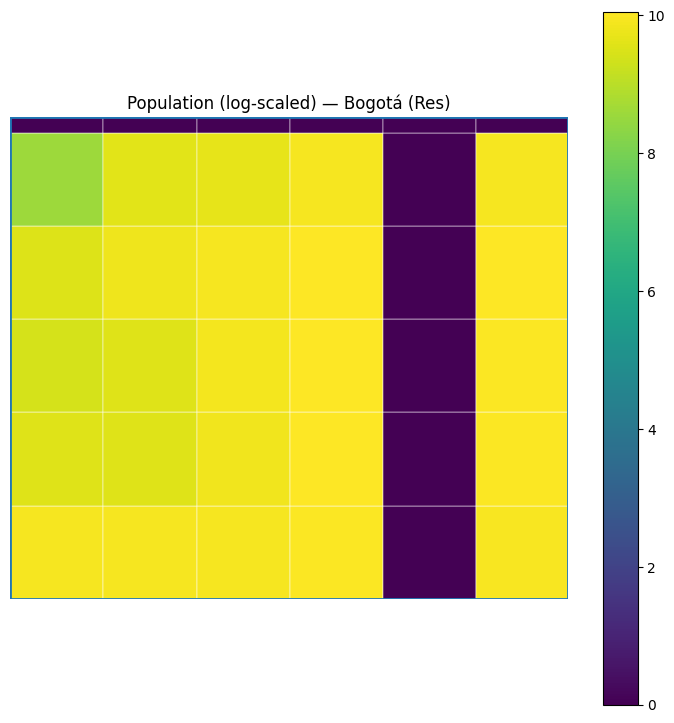

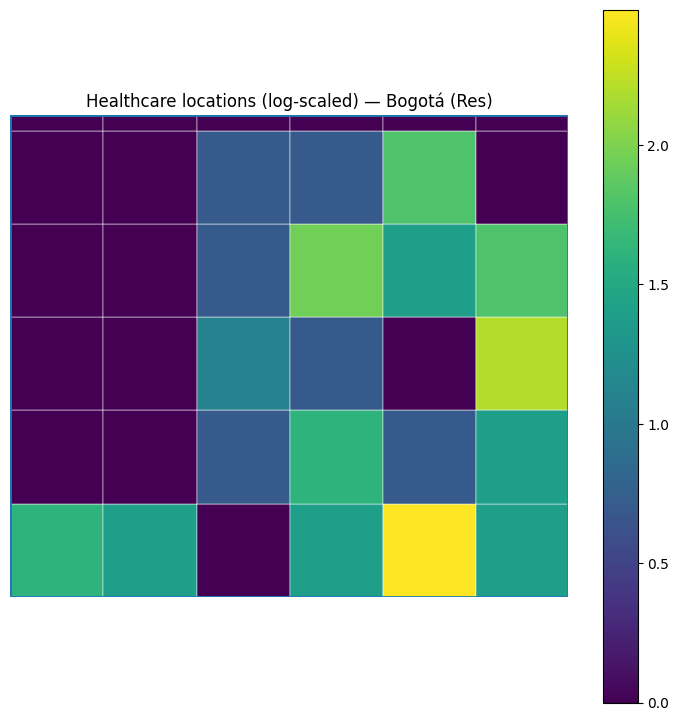

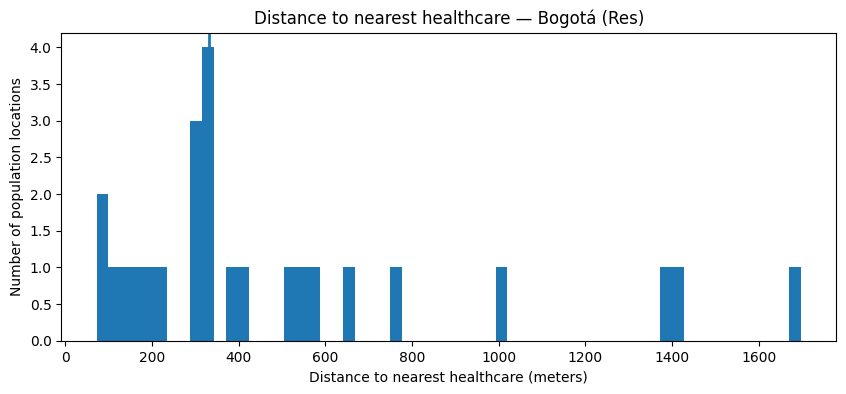


>> Calculating Metrics for All Categories...
Network 'drive' not found in cache. Downloading from OSM...
Network 'walk' not found in cache. Downloading from OSM...
-------------------------------------------------------------------------
CATEGORY: HEALTHCARE
Euclidean (1km):  90.28% coverage (416,056.40625 people)
Driving (10min):  100.00% coverage (460,869.9375 people)
Walking (20min):  100.00% coverage (460,869.9375 people)
--------------------------------------------
services_per_1000 (category healthcare): 0.14320743083953857
people_per_service (category healthcare): 6982.8779296875
------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
CATEGORY: EDUCATION_EARLY
Euclidean (1km):  62.19% coverage (286,604.5625 people)
Driving (10min):  100.00% coverage (460,869.9375 people)
Walking (20min):  100.00% coverage (460,869.9375 people)
--------------------------

In [4]:
# Initialize Lab (Auto-downloads population and services)
lab_bogota = OSMSatLab(bbox=BBOX_BOGOTA_RESIDENTIAL, crs="EPSG:3857")

# Execute Analysis
run_analysis(lab_bogota, "Bogotá (Res)")

## 4. Example: Amsterdam Residential Area
Analyzing a European context. Note how `render_maps` adapts to the region.

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\nld_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [00:00<00:00, 14.19it/s]
C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area



Running Analysis: Amsterdam (Res)

>> Generating Visualizations for 'Healthcare'...


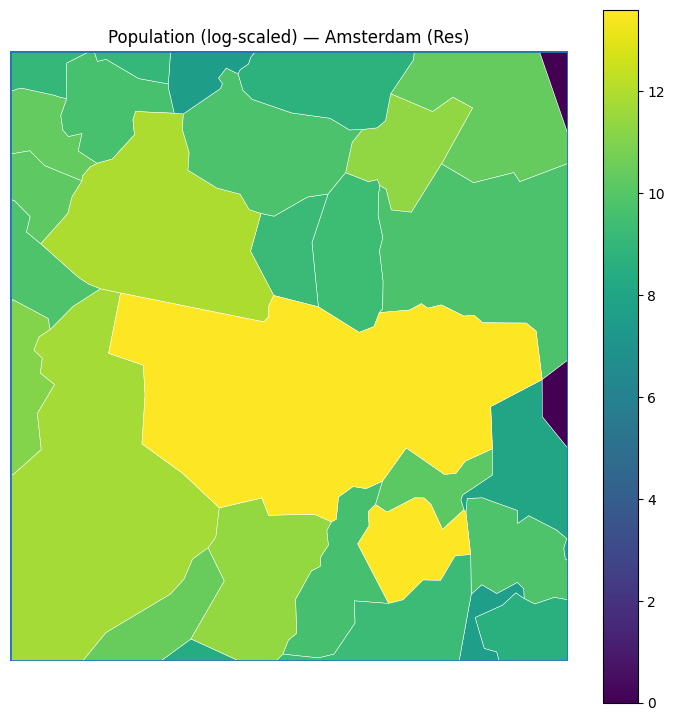

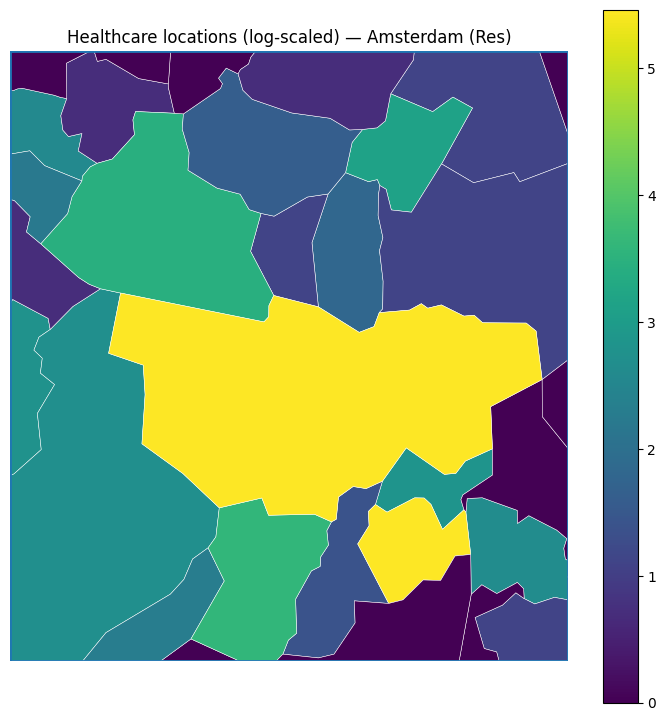

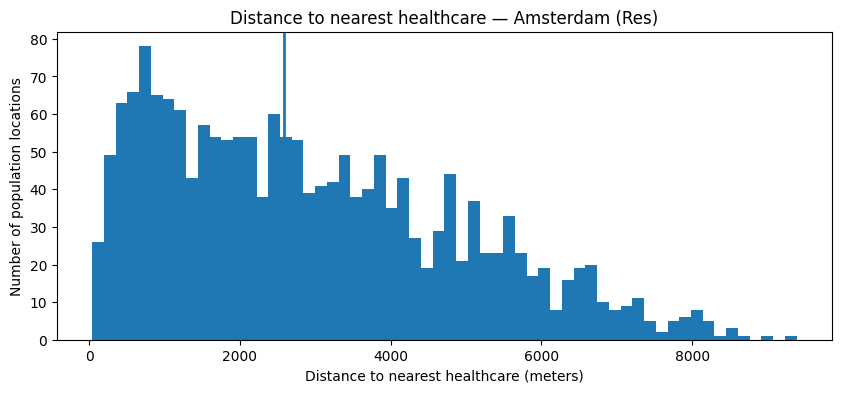


>> Calculating Metrics for All Categories...
Network 'drive' not found in cache. Downloading from OSM...
Network 'walk' not found in cache. Downloading from OSM...
-------------------------------------------------------------------------
CATEGORY: HEALTHCARE
Euclidean (1km):  49.40% coverage (815,778.5 people)
Driving (10min):  90.79% coverage (1,499,293.5 people)
Walking (20min):  97.98% coverage (1,617,904.125 people)
--------------------------------------------
services_per_1000 (category healthcare): 0.2610044479370117
people_per_service (category healthcare): 3831.35205078125
------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
CATEGORY: EDUCATION_EARLY
Euclidean (1km):  27.62% coverage (456,126.21875 people)
Driving (10min):  78.90% coverage (1,302,803.75 people)
Walking (20min):  94.92% coverage (1,567,384.25 people)
---------------------------------

In [5]:
lab_amsterdam = OSMSatLab(bbox=BBOX_AMSTERDAM_RESIDENTIAL, crs="EPSG:3857")

run_analysis(lab_amsterdam, "Amsterdam (Res)")

## 5. Example: Soacha (Custom Geometry)
Using a Shapely polygon instead of a bounding box to clip data precisely to the administrative boundary.

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [08:18<00:00, 62.25s/it] 
C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area



Running Analysis: Soacha

>> Generating Visualizations for 'Healthcare'...


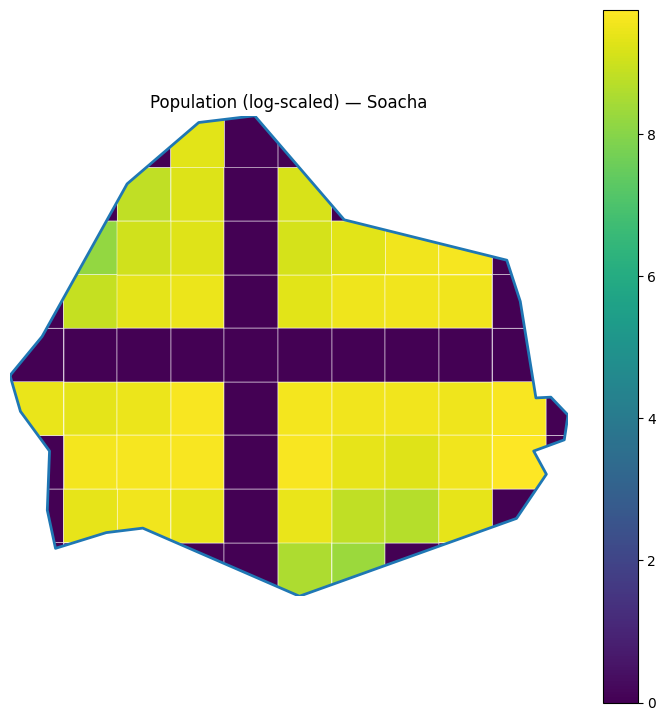

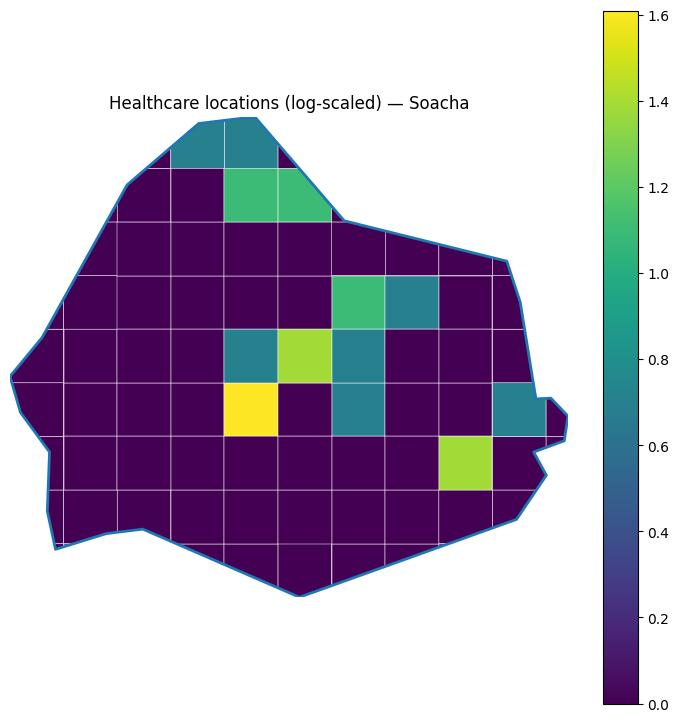

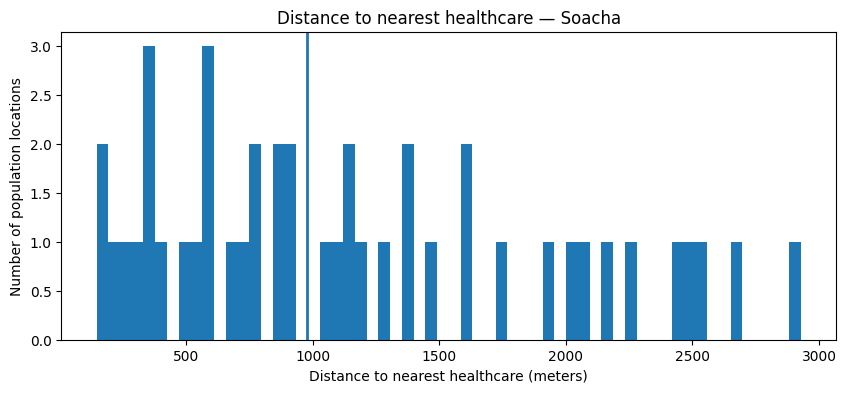


>> Calculating Metrics for All Categories...
Network 'drive' not found in cache. Downloading from OSM...
Network 'walk' not found in cache. Downloading from OSM...
-------------------------------------------------------------------------
CATEGORY: HEALTHCARE
Euclidean (1km):  57.34% coverage (298,555.15625 people)
Driving (10min):  87.09% coverage (453,420.625 people)
Walking (20min):  97.94% coverage (509,898.96875 people)
--------------------------------------------
services_per_1000 (category healthcare): 0.04417702928185463
people_per_service (category healthcare): 22636.19921875
------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
CATEGORY: EDUCATION_EARLY
Euclidean (1km):  34.90% coverage (181,722.390625 people)
Driving (10min):  76.45% coverage (398,040.75 people)
Walking (20min):  94.53% coverage (492,179.5 people)
----------------------------------

In [6]:
lab_soacha = OSMSatLab(custom_geometry=soacha_poly, crs="EPSG:3857")

run_analysis(lab_soacha, "Soacha")